In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from BXAI_ESN_pytorch import ESN as esn

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## 데이터 로드

In [ ]:
df = np.loadtxt("BXAI_Data_MackeyGlass_t17.txt")

## gd 학습을 사용

In [ ]:
model = esn(1,resSize=1500,zero_per = 0.9996,n_feature = 1) # default는 gd 학습법, n_feature: 뇌파 채널 개수와 같은 feature의 수를 의미함

Computing spectral radius...
done.


In [ ]:
model.fit(df[:1000],df[:1000])

epoch: 0, lost:0.27388676170161347
epoch: 1, lost:0.13355869670852008
epoch: 2, lost:0.04516846482623497
epoch: 3, lost:0.005689200417535632
epoch: 4, lost:0.0056078903658642165
epoch: 5, lost:0.02759071579800592
epoch: 6, lost:0.05164132001406324
epoch: 7, lost:0.06440490554831942
epoch: 8, lost:0.0626763705011969
epoch: 9, lost:0.0500493143679698
epoch: 10, lost:0.03257250904477962
epoch: 11, lost:0.01603307908673266
epoch: 12, lost:0.004584042244498733
epoch: 13, lost:0.00011164069779261999
epoch: 14, lost:0.0021281670359044424
epoch: 15, lost:0.008238892939625483
epoch: 16, lost:0.015168424233531343
epoch: 17, lost:0.02001275408097581
epoch: 18, lost:0.021173485346640746
epoch: 19, lost:0.018626401258039247
epoch: 20, lost:0.013583915098263703
epoch: 21, lost:0.007848308219347436
epoch: 22, lost:0.0031404556464898676
epoch: 23, lost:0.0005837694364234654
epoch: 24, lost:0.0004413598260048564
epoch: 25, lost:0.002148742915359862
epoch: 26, lost:0.004615016902568479
epoch: 27, lost:0

ESN()

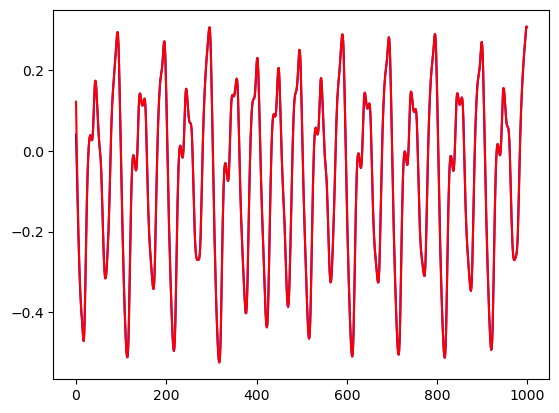

In [ ]:
y_pred = model.predict(df[:1000])
plt.plot(y_pred.cpu().detach().numpy(),'b')
plt.plot(df[:1000],'r')
plt.show()

## torch.save ,load 사용

In [ ]:
# 모델 저장
torch.save(model.state_dict(), 'model.pth') # 사용가능

In [ ]:
model = esn(1,resSize=1500,zero_per = 0.9996) # default는 gd 학습법

Computing spectral radius...
done.


In [ ]:
model.load_state_dict(torch.load('model.pth')) #사용가능

<All keys matched successfully>

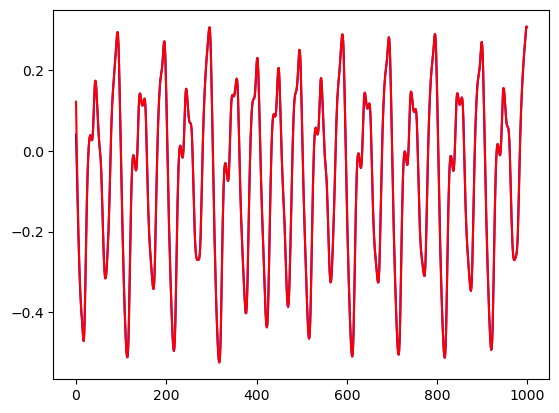

In [ ]:
y_pred = model.predict(df[:1000])
plt.plot(y_pred.cpu().detach().numpy(),'b')
plt.plot(df[:1000],'r')
plt.show()

## inverse_matrix 사용

In [ ]:
model = esn(1,resSize=1000,zero_per = 0,l_a = "inverse_matrix")

Computing spectral radius...
done.


In [ ]:
model.fit(df[:1000],df[:1000])

ESN()

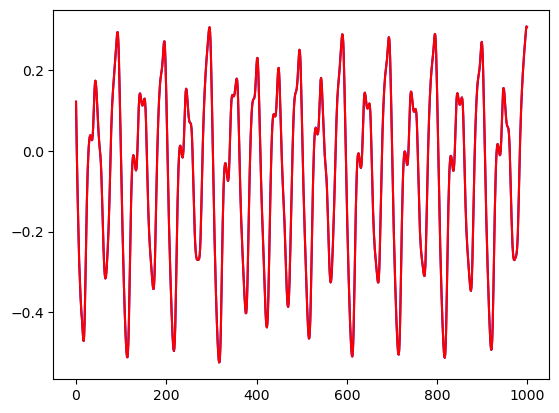

In [ ]:
y_pred = model.predict(input = df[:1000])
plt.plot(y_pred.cpu().detach().numpy(),'b')
plt.plot(df[:1000],'r')
plt.show()

## generativ mode로 future predict

In [ ]:
model = esn(1,resSize=1000,zero_per = 0,l_a = "inverse_matrix")

Computing spectral radius...
done.


In [ ]:
model.future_fit(df[:1000],df[:1000])

ESN()

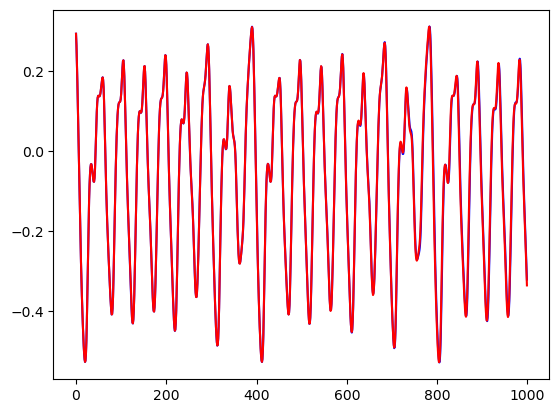

In [ ]:
y_pred = model.future_predict(1000)
plt.plot(y_pred.cpu().detach().numpy(),'b')
plt.plot(df[1000:2000],'r')
plt.show()